# Assignment 2


#### 1. 复习上课内容以及复现课程代码

在本部分，你需要在复习上课内容和课程代码后，复现课程代码。 

代码复现
- 1. get data of city position  
- 2. calc distances between cities
- 3. draw graph of cities
- 4. calc path of two cities basing BFS or DFS
- 5. Gradient Descent of ML

In [3]:
# 1. get data of city position 
coords_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [74]:
line = 'geoCoord:[114.17, 22.28]'
x_y = re.findall("Coord:\[(\d+.\d+),\s(\d+.\d+)\]",line)
print(x_y)  
print(type(x_y))
#x_y = tuple(map(float,x_y))

[('114.17', '22.28')]
<class 'list'>


In [5]:
import re
def get_city_info(city_coords):
    city_location = {}
    for line in city_coords.split("\n"):
        if line.startswith("//"): continue
        if line.strip() == "":continue
            
        city = re.findall("name:'(\w+)'",line)[0]
        x_y = re.findall("Coord:\[(\d+.\d+),\s(\d+.\d+)\]",line)[0]
        x_y = tuple(map(float,x_y))
        city_location[city] = x_y
    return city_location

In [9]:
city_info = get_city_info(coords_source)
print(city_info)

{'兰州': (103.73, 36.03), '嘉峪关': (98.17, 39.47), '西宁': (101.74, 36.56), '成都': (104.06, 30.67), '石家庄': (114.48, 38.03), '拉萨': (102.73, 25.04), '贵阳': (106.71, 26.57), '武汉': (114.31, 30.52), '郑州': (113.65, 34.76), '济南': (117.0, 36.65), '南京': (118.78, 32.04), '合肥': (117.27, 31.86), '杭州': (120.19, 30.26), '南昌': (115.89, 28.68), '福州': (119.3, 26.08), '广州': (113.23, 23.16), '长沙': (113.0, 28.21), '沈阳': (123.38, 41.8), '长春': (125.35, 43.88), '哈尔滨': (126.63, 45.75), '太原': (112.53, 37.87), '西安': (108.95, 34.27), '北京': (116.46, 39.92), '上海': (121.48, 31.22), '重庆': (106.54, 29.59), '天津': (117.2, 39.13), '呼和浩特': (111.65, 40.82), '南宁': (108.33, 22.84), '银川': (106.27, 38.47), '乌鲁木齐': (87.68, 43.77), '香港': (114.17, 22.28), '澳门': (113.54, 22.19)}


In [7]:
# 2. calc distances between cities
# from geopy.distance import geodesic
import math
def geo_distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [10]:
def get_city_distance(city1,city2):
    return geo_distance(city_info[city1],city_info[city2])

get_city_distance("杭州","上海")

153.5185697155768

In [11]:
print(city_info.keys())

dict_keys(['兰州', '嘉峪关', '西宁', '成都', '石家庄', '拉萨', '贵阳', '武汉', '郑州', '济南', '南京', '合肥', '杭州', '南昌', '福州', '广州', '长沙', '沈阳', '长春', '哈尔滨', '太原', '西安', '北京', '上海', '重庆', '天津', '呼和浩特', '南宁', '银川', '乌鲁木齐', '香港', '澳门'])


In [18]:
# 3. draw graph of cities
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

city_graph = nx.Graph()
city_graph.add_nodes_from(list(city_info.keys()))

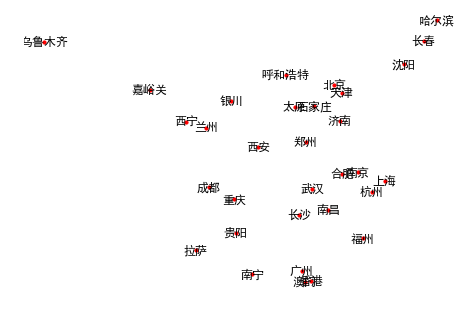

In [19]:
nx.draw(city_graph, city_info, with_labels=True, node_size=10)

In [22]:
# 4 calc connection of two cities
# create edges,draw map of cities with edges

threshold = 700   # defined the threshold
from collections import defaultdict
def build_connection(city_info):
    cities_connection = defaultdict(list)
    cities = list(city_info.keys())
    for c1 in cities:
        for c2 in cities:
            if c1 == c2 : continue
            
            if get_city_distance(c1,c2) < threshold:
                cities_connection[c1].append(c2)
    return cities_connection


In [23]:
cities_connection = build_connection(city_info)
print(cities_connection)

defaultdict(<class 'list'>, {'兰州': ['嘉峪关', '西宁', '成都', '拉萨', '贵阳', '西安', '重庆', '南宁', '银川'], '嘉峪关': ['兰州', '西宁', '成都', '拉萨'], '西宁': ['兰州', '嘉峪关', '成都', '拉萨', '贵阳', '重庆', '银川'], '成都': ['兰州', '嘉峪关', '西宁', '拉萨', '贵阳', '西安', '重庆', '南宁', '银川'], '石家庄': ['武汉', '郑州', '济南', '南京', '合肥', '南昌', '广州', '长沙', '太原', '西安', '北京', '天津', '呼和浩特'], '拉萨': ['兰州', '嘉峪关', '西宁', '成都', '贵阳', '重庆', '南宁', '银川'], '贵阳': ['兰州', '西宁', '成都', '拉萨', '西安', '重庆', '南宁', '银川'], '武汉': ['石家庄', '郑州', '济南', '南京', '合肥', '杭州', '南昌', '福州', '广州', '长沙', '太原', '西安', '北京', '天津', '呼和浩特', '香港', '澳门'], '郑州': ['石家庄', '武汉', '济南', '南京', '合肥', '南昌', '广州', '长沙', '太原', '西安', '北京', '天津', '呼和浩特', '香港', '澳门'], '济南': ['石家庄', '武汉', '郑州', '南京', '合肥', '杭州', '南昌', '福州', '长沙', '太原', '北京', '上海', '天津', '呼和浩特'], '南京': ['石家庄', '武汉', '郑州', '济南', '合肥', '杭州', '南昌', '福州', '长沙', '北京', '上海', '天津'], '合肥': ['石家庄', '武汉', '郑州', '济南', '南京', '杭州', '南昌', '福州', '广州', '长沙', '太原', '北京', '上海', '天津', '香港', '澳门'], '杭州': ['武汉', '济南', '南京', '合肥', '南昌', '福州', '北京', '上海', '天津'], '南

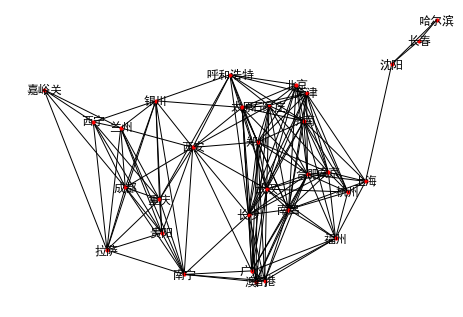

In [162]:
# 这个图如何可以画得更漂亮呢？
cities_connection_graph = nx.Graph(cities_connection)
# plt.figure(figsize=(5,2))
nx.draw(cities_connection_graph,city_info,with_labels=True,node_size=10)

In [129]:
# search basing BFS or DFS

def search_1(graph,start,destination):
    paths = [[start]]  # list 用来存储待搜索路径
    visited = set() # set用来存储已搜索的节点
    
    while paths:
        path = paths.pop(0)  #提取第一条路径
        froniter = path[-1]   #提取即将要探索的节点
        
        if froniter in visited: continue  #检查如果该点已经探索过 则不用再探索
            
        successsors = graph[froniter]
        
        for city in successsors:      #遍历子节点
            if city in path: continue  # check loop #检查会不会形成环
            
            new_path = path+[city]
            
            paths.append(new_path)  #bfs     #将新路径加到list里面
            #pathes = [new_path] + pathes #dfs
            
            if city == destination:  #检查目的地是不是已经搜索到了
                return new_path
        visited.add(froniter)

In [ ]:
def sort_by_distance(paths):
    def get_distance_of_path(path):
        distance = 0
        for i,_ in enumerate(path[:-1]):
            distance += get_city_distance(path[i],path[i+1])
        return distance
    return sorted(paths,key=get_distance_of_path)

def get_distance_of_path(path):
    distance = 0
    for i,_ in enumerate(path[:-1]):
        distance += get_city_distance(path[i],path[i+1])
    return distance

In [131]:
def search_2(graph,start,destination,search_strategy):
    pathes = [[start]]
    visited = set()# ！
    while pathes:
        path = pathes.pop(0)
        froniter = path[-1]
        if froniter in visited : continue# ！
            
        if froniter == destination:# ！
            return path# ！
        
        successsors = graph[froniter]
        
        for city in successsors:
            if city in path: continue  # check loop
            
            new_path = path+[city]
            
            pathes.append(new_path)  #bfs
            
        pathes = search_strategy(pathes)
        visited.add(froniter) # ！
       # if pathes and (destination == pathes[0][-1]):
       #     return pathes[0]  

In [27]:
search_1(cities_connection,"上海","西宁")

['上海', '济南', '太原', '银川', '西宁']

In [32]:
search_2(cities_connection,"北京","上海",search_strategy=lambda x:x)

['北京', '济南', '上海']

In [33]:
search_2(cities_connection,"北京","上海",search_strategy=sort_by_distance)

['北京', '天津', '上海']

In [34]:
# 5. Gradient Descent of ML
# Data preparation
from sklearn.datasets import load_boston
import random
dataset = load_boston()
x,y=dataset['data'],dataset['target']
dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [36]:
print(dataset['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

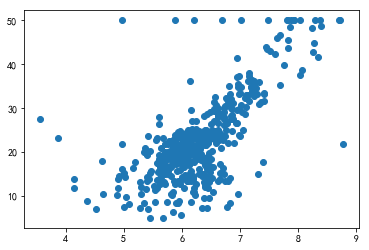

In [60]:
# basic EDA
X_rm = x[:,5]
# plot the RM with respect to y
plt.scatter(X_rm,y)

### Assume that the target funciton is a linear function
$$ y = k*rm + b$$
$$ loss = \frac{1}{n} \sum{(y_i - \hat{y_i})}^2$$
$$ loss = \frac{1}{n} \sum{(y_i - (kx_i + b_i))}^2 $$

In [48]:
# define loss function 
def loss(y,y_hat):
    return sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(list(y),list(y_hat)))/len(list(y))

### Define partial derivatives
$$ \frac{\partial{loss}}{\partial{k}} = -\frac{2}{n}\sum(y_i - \hat{y_i})x_i$$
$$ \frac{\partial{loss}}{\partial{b}} = -\frac{2}{n}\sum(y_i - \hat{y_i})$$

In [49]:
# define partial derivative 
def partial_derivative_k(x, y, y_hat): 
    n = len(y)
    gradient = 0
    for x_i, y_i, y_hat_i in zip(list(x),list(y),list(y_hat)):
        gradient += (y_i-y_hat_i) * x_i
    return -2/n * gradient

def partial_derivative_b(y, y_hat):
    n = len(y)
    gradient = 0
    for y_i, y_hat_i in zip(list(y),list(y_hat)):
        gradient += (y_i-y_hat_i)
    return -2 / n * gradient

#define target function
def price(rm, k, b):
    return k * rm + b

In [53]:
#initialized parameters

k = random.random() * 200 - 100  # -100 100
b = random.random() * 200 - 100  # -100 100

learning_rate = 1e-3

iteration_num = 200 
losses = []
for i in range(iteration_num):
    
    price_use_current_parameters = [price(r, k, b) for r in X_rm]  # \hat{y}
    
    current_loss = loss(y, price_use_current_parameters)
    losses.append(current_loss)
    print("Iteration {}, the loss is {}, parameters k is {} and b is {}".format(i,current_loss,k,b))
    
    k_gradient = partial_derivative_k(X_rm, y, price_use_current_parameters)
    b_gradient = partial_derivative_b(y, price_use_current_parameters)
    
    k = k + (-1 * k_gradient) * learning_rate
    b = b + (-1 * b_gradient) * learning_rate
best_k = k
best_b = b

Iteration 0, the loss is 68728.86215139531, parameters k is -22.544553518096876 and b is -96.91855608837585
Iteration 1, the loss is 57938.0923210563, parameters k is -19.23108517018534 and b is -96.39628481097623
Iteration 2, the loss is 48843.55187433966, parameters k is -16.18918811295781 and b is -95.91670595037277
Iteration 3, the loss is 41178.606024259956, parameters k is -13.396605828963173 and b is -95.4763206691878
Iteration 4, the loss is 34718.53301182279, parameters k is -10.83290582477929 and b is -95.0719168758682
Iteration 5, the loss is 29273.935686204026, parameters k is -8.479330143849731 and b is -94.70054572454553
Iteration 6, the loss is 24685.188736081796, parameters k is -6.318658130481454 and b is -94.35950004084073
Iteration 7, the loss is 20817.758775374376, parameters k is -4.335080440964431 and b is -94.04629451577334
Iteration 8, the loss is 17558.260077089384, parameters k is -2.5140833800598275 and b is -93.75864752287113
Iteration 9, the loss is 14811.1

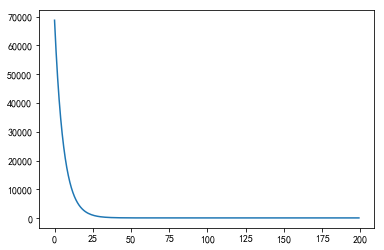

In [54]:
plt.plot(list(range(iteration_num)),losses)

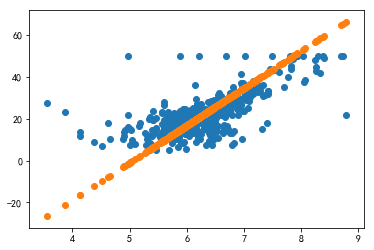

In [55]:
price_use_best_parameters = [price(r, best_k, best_b) for r in X_rm]

plt.scatter(X_rm,y)
plt.scatter(X_rm,price_use_current_parameters)

#### 2. 回答以下理论题目

###       < 评阅点 >： 答案是否正确完整

###### 2.1 What conditions are required to make the BFS return the optimal solution ?
- weight of each edge gte 0

##### 2.2 Is there a way to make DFS find the optimal solution ? (You may need to read some material about iterative DFS)
- No

##### 2.3 In what conditions BFS is a better choice than DFS and vice versa ?
- BFS: can be optimized,but need more storage spaces.
- DFS: Storage Space requirements is O(b*d) while BFS is O(b^ d)

##### 2.4 When can we use machine learning ?
- There exists lots of data, and we can find a loss funciton to reduce loss by gradient descent method. 

##### 2.5 What is the gradient of a function ?
- Derivation, a vector indicates direction and the magnitude of change rate

##### 2.6 How can we find the maximum value of a function using the information of gradient ?
- Derivation ==0

#### 3. 实践部分  寻找地铁路线

In [ ]:
### API接口地址：http://www.yanweijia.cn/2016/07/24/subway_info_api/
### 北京地铁线路网站：https://www.bjsubway.com/station/zjgls/#
### https://www.wuhanrt.com/public_forward.aspx??url=Route_details.aspx
### https://github.com/alyzleafbell/python-spider/blob/master/subwaymap/main.py
### https://blog.csdn.net/HollyRan/article/details/85254375 
### 根据json格式说明获取武汉地图数据 http://map.amap.com/service/subway?_1469083453978&srhdata=4201_drw_wuhan.json
'''
{
"s":"武汉市地铁"，
"o":"732,573",
"l":[    //各条线路属性列表
       {    //一条线路属性字典
           "f":[],
           "lo":"0",
           "li":"420100034364|420100034365",
           "ln":"1号线",        //线路名称
           "ls":"420100034364",     //路线编号
            "c":[],
            "cl":"3080B7",
            "lp":["122 463"],
            "su":"1",
            "la":"",
            "st":[    //线路站点属性列表
                      {
                          "sl":"114.329481,30.711953",
                          "sid":"420100034364030",    //站点编号
                          "sp":"han kou bei",
                          "udsi":"420100034364030;420100034365002",
                          "n":"汉口北",            //站名
                          "udpx":"1233 58;1230 55",
                          "si":"420100034364030",        //站点编号
                          "udsu":"1;1",
                          "poiid":"BV10060938",
                          "t":"0",//是否可换乘
                          "r":"420100034364",//所属线路，若可换乘站此处对应多个用'|'分隔的线路
                          "lg":"2",
                          "p":"1232 57",
                          "udli":"420100034364;420100034365",
                          "su":"1",            //可用状态（1可用，3正在建设）
                          "rs":"1232 57"
                      }，
                      ...............
                      {}，
                  ]，
            "kn":"轨道交通1号线",
            "x":1
       }，
       .............
       {}，
     ]，
"i":"4201"        //城市编号
}
'''
原文链接：https://blog.csdn.net/CSDN131137/article/details/89852882

### < 评阅点 >  1: 爬虫爬取数据是否完整;  2:搜索算法是否正确

In this part, although we recommend you to use Beijing subway, you still can use the subway map of any cities that you are interested in. 

![title](img/ditu.png)

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system.

Deadline: 2019-October-27

#### Procedures

#### 1. Get data from web.  

Some tips: 

a. You might need this package: requests[https://2.python-requests.org/en/master/] to get webpages

b.You might need to use Regular Expression and Beautiful Soap package to parse the webpages

** 武汉地铁线路推荐
- 1. 获取武汉地铁线路及站点数据
- 2. 构造站点和站点链接的graph
- 3. 用搜索算法计算最短路径

In [57]:
# 通过高德地图网址获取武汉地铁json数据
import requests
import json
def query_site(url):
    r = requests.get(url)
    print("requesting", r.url)

    if r.status_code == requests.codes.ok:
        return r.json()
    else:
        r.raise_for_status()

In [58]:
def city_metros(metro_json):
    print("city:"+ metro_json['s'])
    linecnt = len(metro_json['l'])
    print("lines cnt:",linecnt)
    for l in metro_json['l']:
        print(l['kn'])

def stations_info(mtro,lno):
    ljson = mtro['l'][lno]
    stcnt = len(ljson['st'])
    print((ljson['kn']+'  共{}站  ').format(stcnt))
    for st in ljson['st']:
        info = (st['n']) + '  ' + st['sid'] + '  '
        info += st['sl']
        if st['t']:
            info += '  可换乘到：' + st['r']
        print(info)


In [59]:
Metro_URL = "http://map.amap.com/service/subway?_1469083453978&srhdata=4201_drw_wuhan.json"
results = query_site(Metro_URL)
city_metros(results)
stations_info(results,0)

requesting http://map.amap.com/service/subway?_1469083453978&srhdata=4201_drw_wuhan.json
city:武汉市地铁
lines cnt: 10
轨道交通1号线
轨道交通2号线
轨道交通3号线
轨道交通4号线
轨道交通6号线
轨道交通7号线
轨道交通8号线
轨道交通8号线(军运专线)
轨道交通11号线
轨道交通21号线(阳逻线)
轨道交通1号线  共32站  
汉口北  420100034364030  114.329481,30.711953  可换乘到：420100034364
滠口新城  420100034364029  114.342372,30.684553  可换乘到：420100034364
滕子岗  420100034364028  114.341474,30.674527  可换乘到：420100034364
堤角  420100034364027  114.338273,30.665863  可换乘到：420100034364
新荣  420100034364026  114.334533,30.655893  可换乘到：420100034364
丹水池  420100034364025  114.330017,30.643386  可换乘到：420100034364
徐州新村  420100034364024  114.322936,30.631171  可换乘到：420100034364
二七路  420100034364023  114.318749,30.625032  可换乘到：420100034364
头道街  420100034364022  114.313923,30.617818  可换乘到：420100034364
黄浦路  420100034364021  114.308156,30.608404  可换乘到：420100034364|900000044147
三阳路  420100034364020  114.301348,30.598718  可换乘到：420100034364|900000044148
大智路  420100024335017  114.295038,30.592581  可换乘到：420100034364|4201000

##### 2. Preprocessing data

Some tips:

a. Find a suitable way to save the data you get from the web. (Note: The way you use to save the data should be able to be used to create the graph that your agent is going to explore)

In [190]:
# 根据地铁站点和连通情况，构建武汉地铁graph
import requests
import json
from collections import defaultdict
def get_station_info(metro_json):
    station_info = {}
    s_connection = defaultdict(list)
    line_info = defaultdict(str)
    for line in metro_json['l']:
        for i in range(len(line['st'])):
            st = line['st'][i]
            re.findall("(\d+.\d+),\s(\d+.\d+)",st['sl'])
            ll = st['sl'].split(',')
            ll = [float(l) for l in ll]
            key = st['n']#.split('(')[0]
            station_info[key]=tuple(ll)# tuple(map(float,x_y))
            # get connection info ,bigram
            if (i+1)<len(line['st']): 
                key1 = line['st'][i+1]['n']# .split('(')[0]
                s_connection[key].append(key1)
                s_connection[key1].append(key)
            if st['t']=='0':
                line_info[key]=line['ln']

    return station_info,s_connection,line_info

In [85]:
tuple(map(float,'12.3,13.4'.split(',')))

(12.3, 13.4)

In [191]:
stations, stat_connection, line_info= get_station_info(results)

In [192]:
# print(stations)
#print(stat_connection)
#keylist = line_info.keys
for key in line_info.keys():
    print(key,line_info[key])

汉口北 1号线
滠口新城 1号线
滕子岗 1号线
堤角 1号线
新荣 1号线
丹水池 1号线
徐州新村 1号线
二七路 1号线
头道街 1号线
友谊路 1号线
利济北路 1号线
崇仁路 1号线
硚口路 1号线
太平洋 1号线
汉西一路 1号线
古田四路 1号线
古田三路 1号线
古田二路 1号线
古田一路 1号线
舵落口 1号线
竹叶海 1号线
额头湾 1号线
五环大道 1号线
东吴大道 1号线
码头潭公园 1号线
三店 1号线
径河 1号线
佛祖岭 2号线
藏龙东街 2号线
秀湖 2号线
金融港北 2号线
黄龙山路 2号线
佳园路 2号线
光谷大道 2号线
华中科技大学 2号线
珞雄路 2号线
光谷广场 2号线
杨家湾 2号线
虎泉 2号线
广埠屯 2号线
街道口 2号线
宝通寺 2号线
小龟山 2号线
积玉桥 2号线
中山公园 2号线
青年路 2号线
汉口火车站 2号线
长港路 2号线
金银潭 2号线
常青城 2号线
盘龙城 2号线
巨龙大道 2号线
宋家岗 2号线
航空总部 2号线
天河机场 2号线
沌阳大道 3号线
体育中心 3号线
三角湖 3号线
汉阳客运站 3号线
四新大道 3号线
陶家岭 3号线
龙阳村 3号线
双墩 3号线
云飞路 3号线
菱角湖 3号线
惠济二路 3号线
罗家庄 3号线
二七小路 3号线
兴业路 3号线
市民之家 3号线
柏林 4号线
新庙村 4号线
临嶂大道 4号线
蔡甸广场 4号线
凤凰路 4号线
新农 4号线
知音 4号线
集贤 4号线
新天 4号线
黄金口 4号线
孟家铺 4号线
永安堂 4号线
玉龙路 4号线
十里铺 4号线
七里庙 4号线
五里墩 4号线
汉阳火车站 4号线
拦江路 4号线
复兴路 4号线
首义路 4号线
梅苑小区 4号线
楚河汉街 4号线
青鱼嘴 4号线
东亭 4号线
铁机路 4号线
罗家港 4号线
园林路 4号线
仁和路 4号线
工业四路 4号线
杨春湖 4号线
武汉火车站 4号线
金银湖公园 6号线
金银湖 6号线
轻工大学 6号线
杨汊湖 6号线
石桥 6号线
唐家墩 6号线
三眼桥 6号线
苗栗路 6号线
六渡桥 6号线
汉正街 6号线
武胜路 6号线
琴台 6号线
马鹦路 6号线
建港 6号线
前进村 6号线
国博中心北 6号线
国博中心南 6号线
老关村 6号线
江城大道 6号线
车城东路 

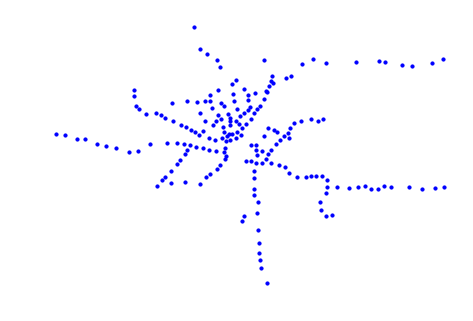

In [143]:
station_graph = nx.Graph()
station_graph.add_nodes_from(list(stations.keys()))

nx.draw(station_graph, stations,node_color='b', with_labels=False, node_size=10)#pos=nx.spectral_layout(station_graph),
#nx.draw(g, pos=nx.spectral_layout(g), nodecolor='r', edge_color='b')
#plt.show()

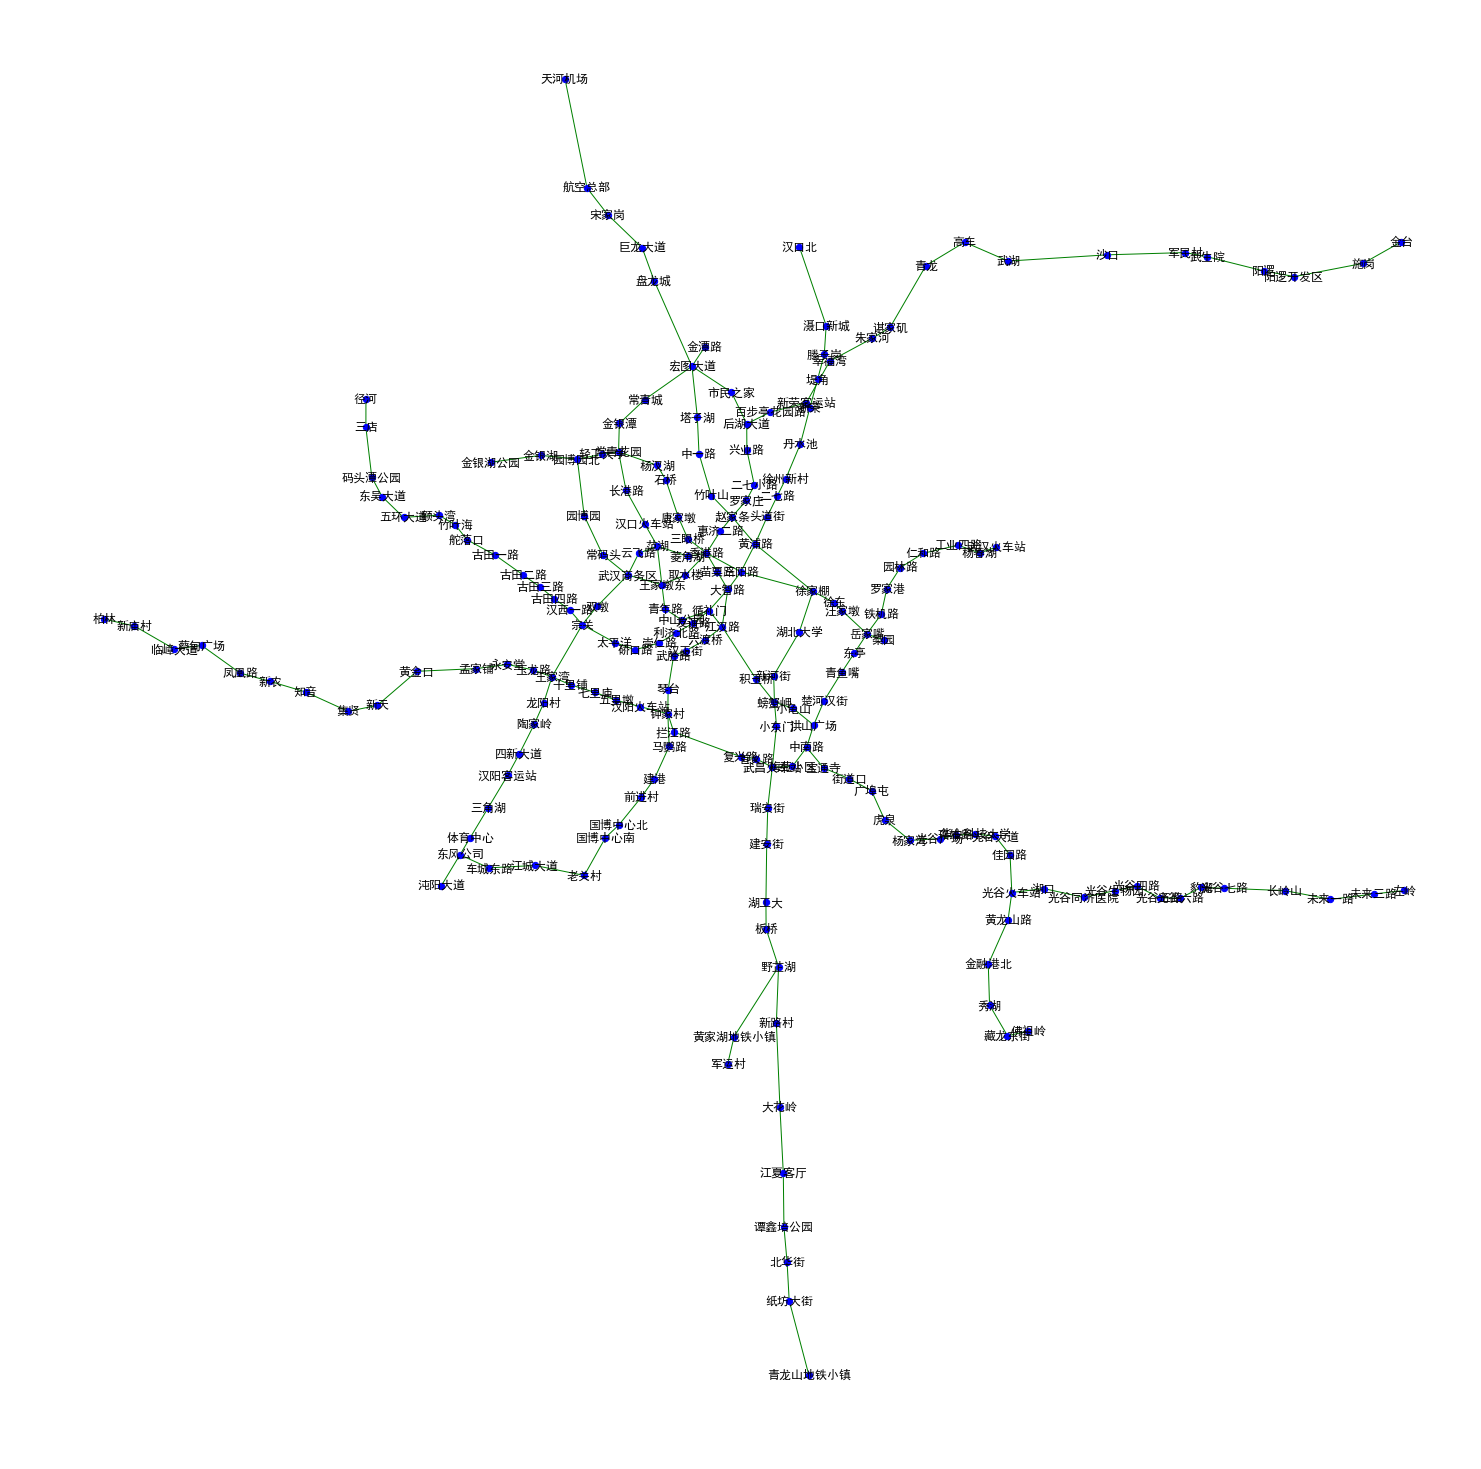

In [156]:
# connections
station_connection_graph = nx.Graph(stat_connection)
# draw edges and zoom canvas
plt.figure(figsize=(20,20))

nx.draw(station_connection_graph,stations,node_color='b', edge_color = 'g',with_labels=True, node_size=40)

#### 3. Build the search agent

Build the search agent based ont he graph you built.

for example, if you use Beijing subway graoh, and you run:

\>>> search("奥体中心“，”天安门“）

You should get the result as follows: 奥体中心 -> A ->B ->C ... -> 天安门

In [133]:
print(stat_connection['塔子湖'])

['中一路']


In [224]:
def sort_by_transfer(paths,l_info):
    def get_transfer_cnt_of_path(path):
        lines=set()
        for st in path:
            if l_info[st]>'':
                lines.add(l_info[st])
        #print(lines)
        return len(lines)-1

    return sorted(paths,key=get_transfer_cnt_of_path)



In [201]:
get_tranfer_cnt_of_path(['常青花园', '宏图大道', '盘龙城'],line_info)

0

In [225]:
# search agent
# search basing BFS or DFS

def search_agent(graph,start,destination,line_info,search_strategy,):
    paths = [[start]]  # list 用来存储待搜索路径
    visited = set() # set用来存储已搜索的节点
    
    while paths:
        path = paths.pop(0)  #提取第一条路径
        froniter = path[-1]   #提取即将要探索的节点
        
        if froniter in visited: continue  #检查如果该点已经探索过 则不用再探索
            
        successsors = graph[froniter]
        
        for city in successsors:      #遍历子节点
            if city in path: continue  # check loop #检查会不会形成环
            
            new_path = path+[city]
            
            paths.append(new_path)  #bfs     #将新路径加到list里面
            #pathes = [new_path] + pathes #dfs
            
            if city == destination:  #检查目的地是不是已经搜索到了
                return new_path

        paths = search_strategy(paths,line_info)
        visited.add(froniter) # ！
#search_1(stat_connection,"盘龙城","塔子湖")
#search_2(stat_connection,"塔子湖","盘龙城",search_strategy=sort_by_distance)

In [226]:
search_agent(stat_connection,'塔子湖','罗家港',line_info,sort_by_transfer)

['塔子湖',
 '中一路',
 '竹叶山',
 '赵家条',
 '黄浦路',
 '徐家棚(8号线)',
 '徐东',
 '汪家墩',
 '岳家嘴',
 '铁机路',
 '罗家港']

In [158]:
search_agent(stat_connection,'塔子湖','盘龙城')

['塔子湖', '宏图大道', '盘龙城']

In [157]:
search_agent(stat_connection,'盘龙城','塔子湖')

['盘龙城', '宏图大道', '塔子湖']

### (Optional) Improve your agent to make it able to find a path based on different strategies

###  <评阅点> : 是否正确得到不同目标下的路径。

Some ideas you might want to try:

a. Find the shortest path between two stations.

b. Find the path that requires minimum transfers between two stations.

c. Combine the previous two ideas, find a more suitable path.

Compare your results with results obtained by using some apps such as Baidu map, A map, Google map or Apple map. If there is difference, try to explanate it.

## Congratulations ! You have finished the assignment of week 2.

![title](img/agent.png)

### If you have any suggestions regarding the teaching, please feel free to send them to my eamil (eric.lee.xiao@gmail.com) 

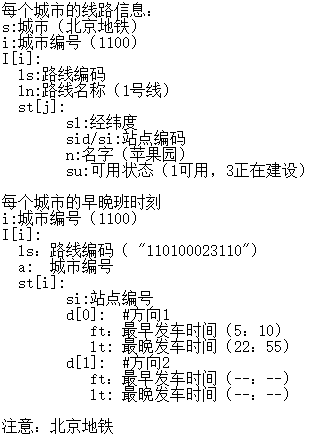